In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
kpi = pd.read_csv('../data/kpisetting.csv')
kpi['date'] = pd.to_datetime(kpi.date)
kpi = kpi.set_index('date', drop=True)
kpi.head()

,visitors,downloads,installations,28dactive
date,,,,
2015-01-14,16489,1826,570,270
2015-01-15,16362,936,266,104
2015-01-16,16463,188,61,67
2015-01-17,15972,474,112,40
2015-01-18,16659,186,109,32


In [5]:
from sklearn.model_selection import train_test_split
X = kpi[['visitors']]
y = kpi.downloads
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)
X_train.head()

,visitors
date,
2018-02-28,28048
2017-04-30,24676
2016-09-02,22336
2020-06-04,36255
2018-03-20,27439


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [8]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse, r2)

740457.8704963165 0.23043040140011595


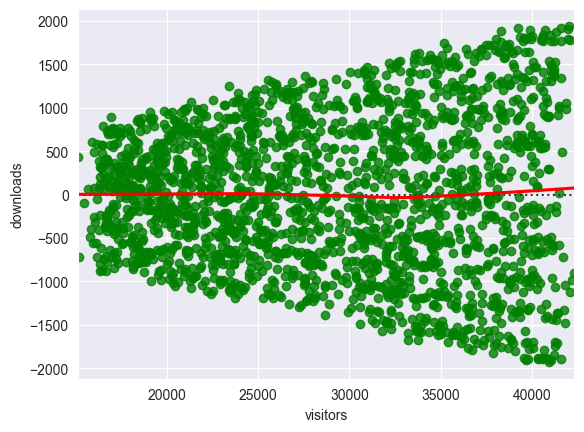

In [9]:
import seaborn as sns
sns.residplot(x=X_test, y=y_test, lowess=True, line_kws={'color': 'red'}, color='green');

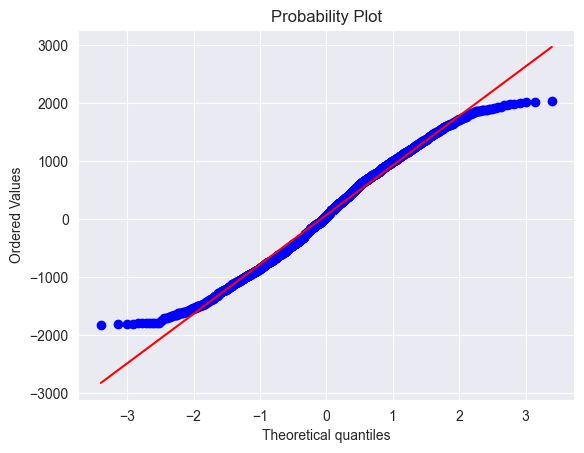

In [10]:
import scipy.stats as stats
import matplotlib.pyplot as plt
residuals = y_test - y_pred
# Plot the residuals
stats.probplot(residuals, plot=plt);